## Aim 

In this script, the [Simple vegetation map of the Western Ghats with 14-classes of vegetation data](https://indiabiodiversity.org/map?layers=lyr_151_wg_simple_14class_vegetation) from the [India Biodiversity portal](https://indiabiodiversity.org/) are investigated for any typological errors before uploading them to Google Earth Engine. 

The same can also be done in QGIS or in Mapshaper.

## Importing Python packages

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

## from pyfonts import load_google_font - Leaving this out for now
from pathlib import Path

## Checking the .shp file for validity in Geopandas

In [2]:
path_dir = Path.cwd().parent
print(f'The path to the data is {path_dir}.')

# The path to the actual datafile:
path_file = path_dir / 'lyr_151_wg_simple_14class_vegetation' / 'lyr_151_wg_simple_14class_vegetation.shp'
print(f'The path to the shape file is:\n {path_file}')


The path to the data is c:\Ellen\personal\projects\geospatial\mapbiomass.
The path to the shape file is:
 c:\Ellen\personal\projects\geospatial\mapbiomass\lyr_151_wg_simple_14class_vegetation\lyr_151_wg_simple_14class_vegetation.shp


In [3]:
## Read in the shape file:
gdf = gpd.read_file(path_file)
gdf.head()

__mlocate_  __mlocate0  __mlocate1  __mlocate2  __mlocate3  __mlocate4  \
0    261814.0       276.0           1         0.0         1.0  2011-10-04   
1    261815.0       276.0           1         0.0         1.0  2011-10-04   
2    261816.0       276.0           1         0.0         1.0  2011-10-04   
3    261817.0       276.0           1         0.0         1.0  2011-10-04   
4    261818.0       276.0           1         0.0         1.0  2011-10-04   

   __mlocate5  __mlocate6  __mlocate7  __mlocate8         area     perimeter  \
0         1.0  2011-10-04         1.0  2011-10-04  7476.796605  16187.360328   
1         1.0  2011-10-04         1.0  2011-10-04  5484.670719  21679.336133   
2         1.0  2011-10-04         1.0  2011-10-04  6689.746698  24366.523983   
3         1.0  2011-10-04         1.0  2011-10-04  9575.616674  36922.310161   
4         1.0  2011-10-04         1.0  2011-10-04  3046.038943   7258.282863   

   code                                         forest_typ  \
0   1.0                       Wet evergreen primary forest   
1   2.0        Wet evergreen secondary or disturbed forest   
2   3.0                   Secondary moist deciduous forest   
3   4.0  Degraded formation in the potential area of we...   
4   5.0     Primary moist deciduous forest and degradation   

                                            geometry  
0  MULTIPOLYGON (((77.50733 8.34598, 77.50746 8.3...  
1  MULTIPOLYGON (((77.33167 8.56665, 77.33273 8.5...  
2  MULTIPOLYGON (((77.50743 8.32848, 77.50734 8.3...  
3  MULTIPOLYGON (((77.45170 8.35524, 77.45203 8.3...  
4  MULTIPOLYGON (((77.42274 8.26574, 77.42124 8.2...

In [4]:
gdf.shape

(14, 15)

In [5]:
print(f'The shape of the Geopandas dataframe is {gdf.shape}.')

The shape of the Geopandas dataframe is (14, 15).


<Axes: >

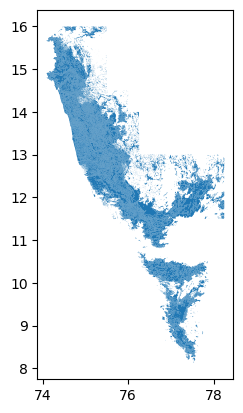

In [6]:
gdf.plot()

<Axes: >

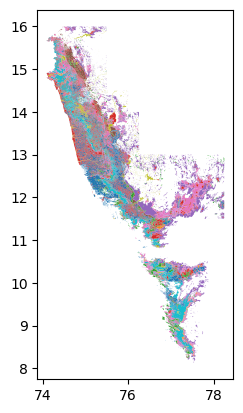

In [7]:
gdf.plot(column = 'forest_typ')

Just a very basic plot using the standard settings (e.g. fonts and other)

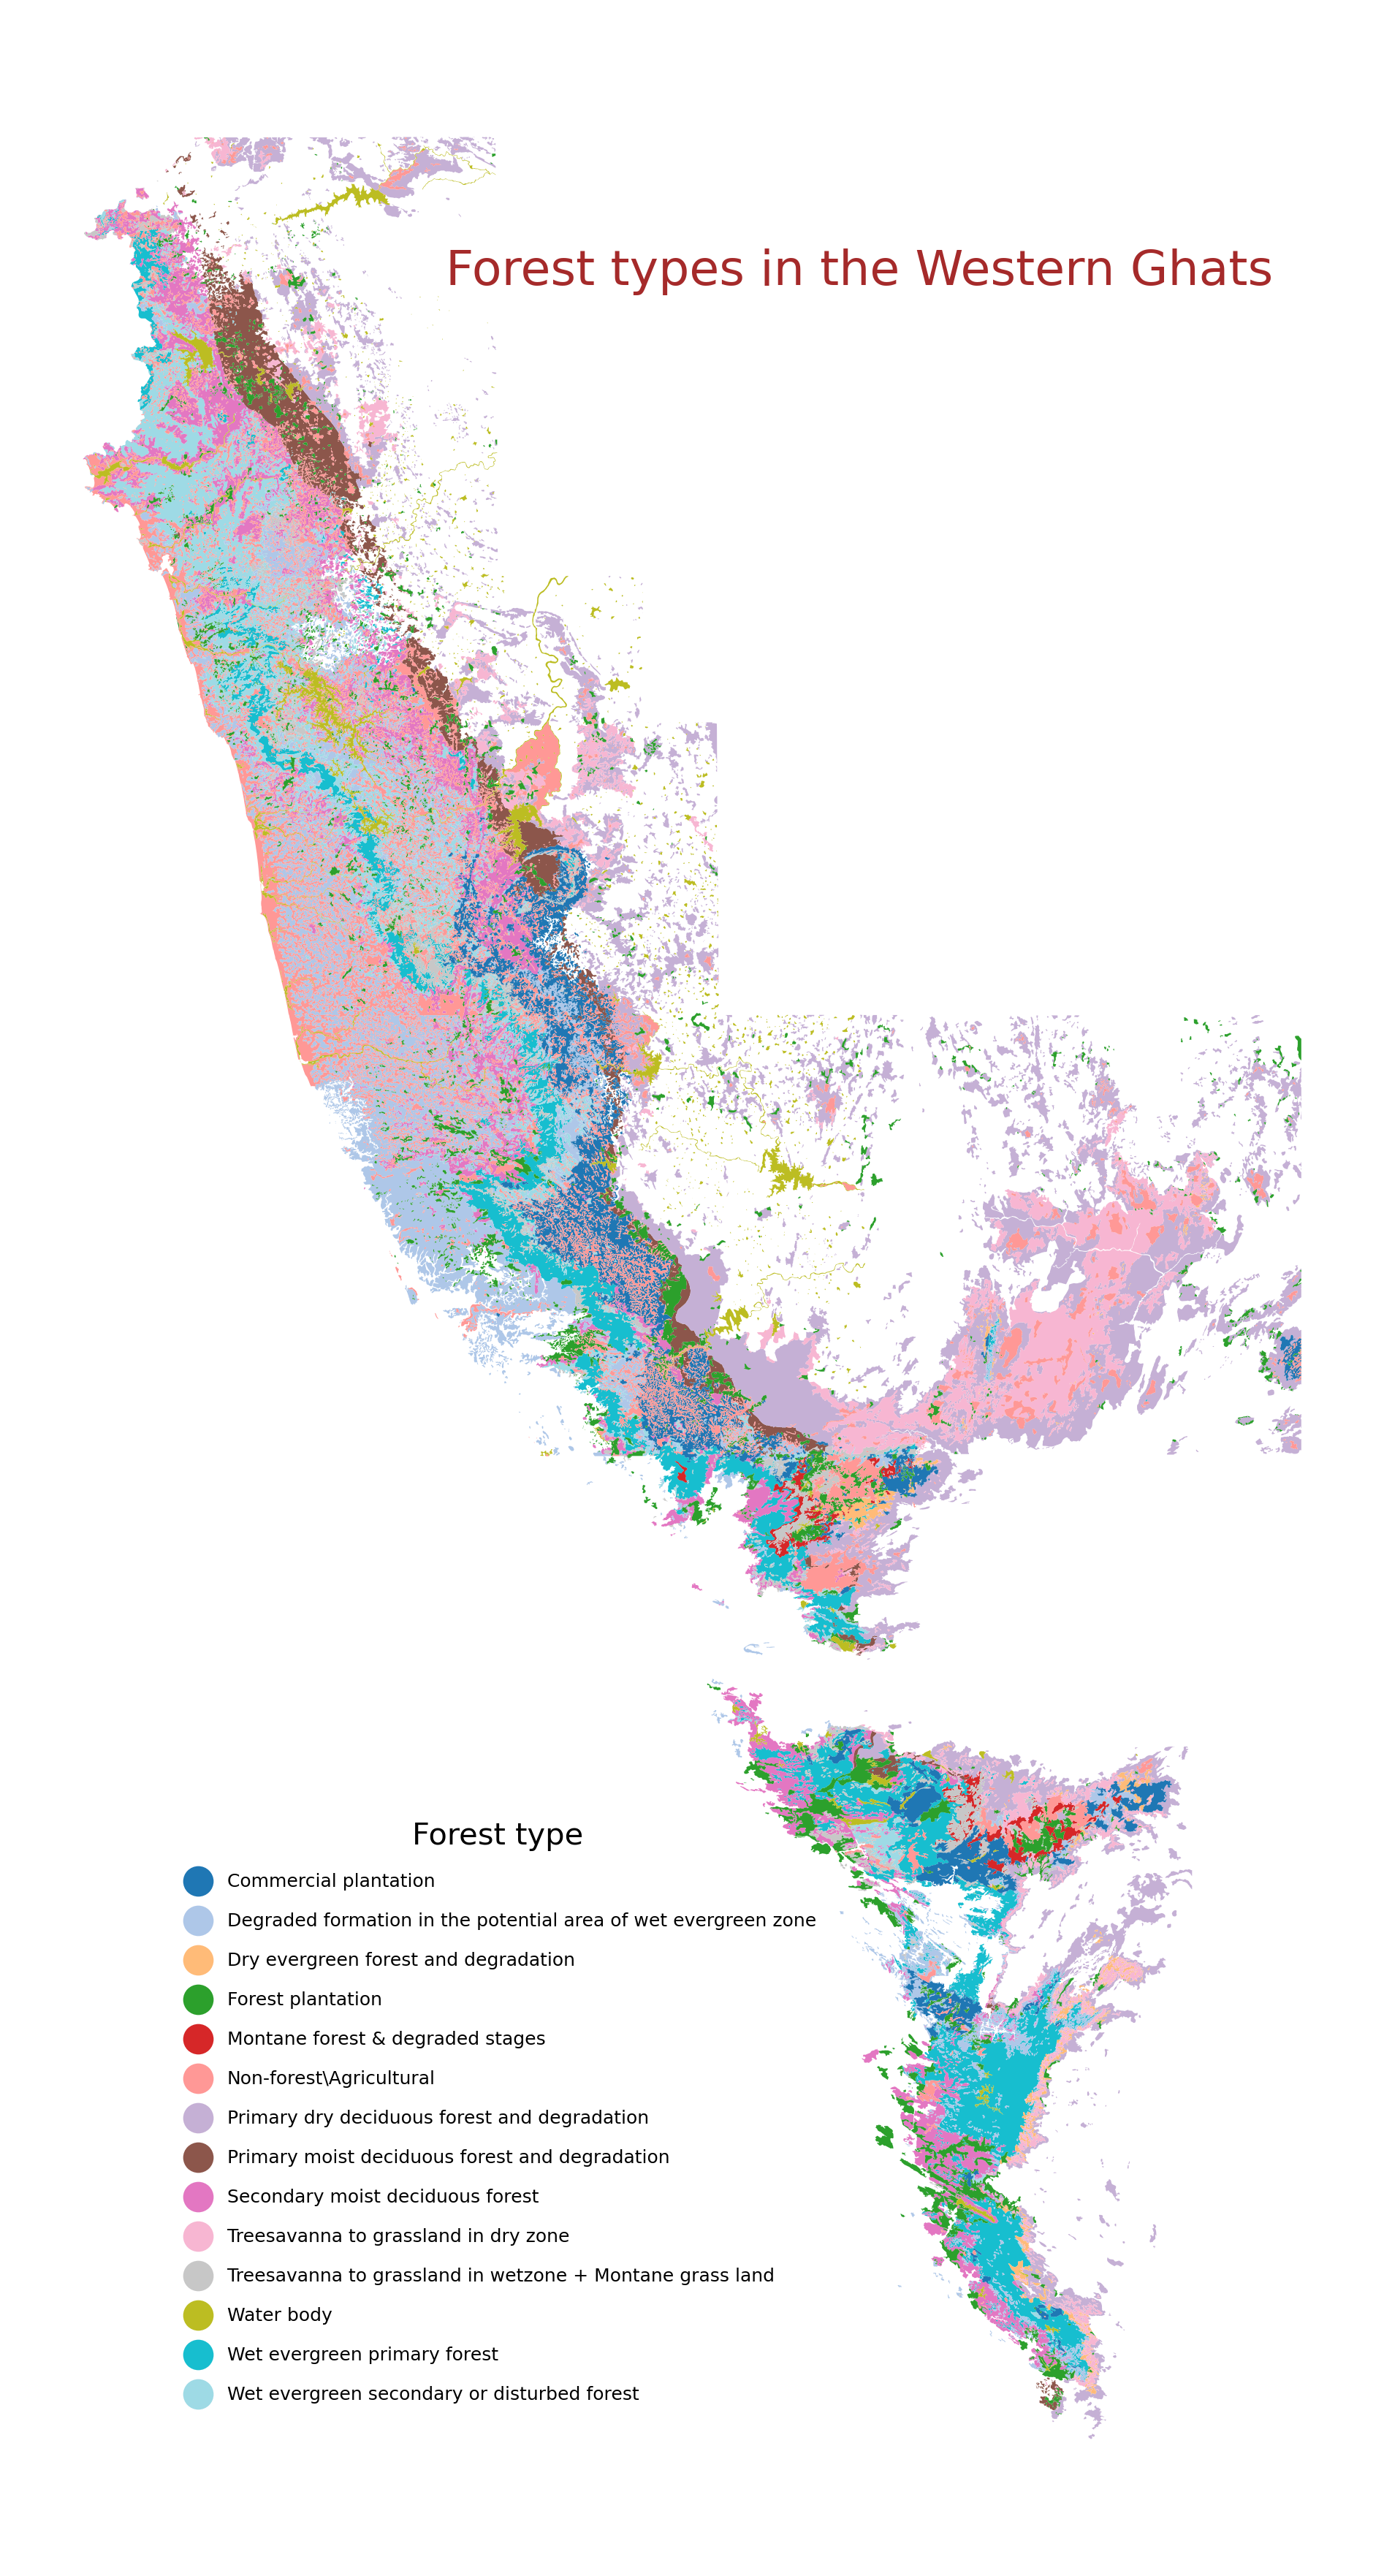

In [8]:
cmap = plt.colormaps.get_cmap("tab20")

legend_kwds= {
  'loc': 'lower left',
  'bbox_to_anchor': (0.1, 0.05),
  'frameon': False,
  'fontsize': 6,
  'title': 'Forest type',
  'labelspacing': 1.2,        # increases vertical spacing
   'handletextpad': 0.6,       # space between marker and text
   'borderpad': 0.8,           # internal padding of legend box
}
fig, ax = plt.subplots(figsize=(10, 15), dpi=300)
gdf.plot(ax=ax, 
         categorical = True,
         cmap = cmap,
         column = 'forest_typ',
         legend = True,
         legend_kwds = legend_kwds)

fig.text(x=0.40, 
         y=0.80, 
         s="Forest types in the Western Ghats", 
         size=16,
         color='brown')   

ax.set_axis_off()

plt.savefig("forest_types_western_ghats.png",
            dpi=300,
            bbox_inches="tight",
            facecolor="white")

plt.show()

Function to split the multipolygon into single polygons:

In [10]:
gdf_single = gdf.explode(index_parts=False)

In [11]:
# Reset the index too:
gdf_single = gdf_single.reset_index(drop=True)
gdf_single.head()

__mlocate_  __mlocate0  __mlocate1  __mlocate2  __mlocate3  __mlocate4  \
0    261814.0       276.0           1         0.0         1.0  2011-10-04   
1    261814.0       276.0           1         0.0         1.0  2011-10-04   
2    261814.0       276.0           1         0.0         1.0  2011-10-04   
3    261814.0       276.0           1         0.0         1.0  2011-10-04   
4    261814.0       276.0           1         0.0         1.0  2011-10-04   

   __mlocate5  __mlocate6  __mlocate7  __mlocate8         area     perimeter  \
0         1.0  2011-10-04         1.0  2011-10-04  7476.796605  16187.360328   
1         1.0  2011-10-04         1.0  2011-10-04  7476.796605  16187.360328   
2         1.0  2011-10-04         1.0  2011-10-04  7476.796605  16187.360328   
3         1.0  2011-10-04         1.0  2011-10-04  7476.796605  16187.360328   
4         1.0  2011-10-04         1.0  2011-10-04  7476.796605  16187.360328   

   code                    forest_typ  \
0   1.0  Wet evergreen primary forest   
1   1.0  Wet evergreen primary forest   
2   1.0  Wet evergreen primary forest   
3   1.0  Wet evergreen primary forest   
4   1.0  Wet evergreen primary forest   

                                            geometry  
0  POLYGON ((77.50733 8.34598, 77.50746 8.34559, ...  
1  POLYGON ((77.48588 8.34754, 77.48559 8.34735, ...  
2  POLYGON ((77.47933 8.35384, 77.47863 8.35311, ...  
3  POLYGON ((77.49392 8.37097, 77.49303 8.37096, ...  
4  POLYGON ((77.48305 8.37366, 77.48321 8.37359, ...

<Axes: >

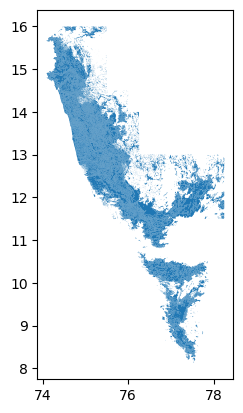

In [12]:
gdf_single.plot()

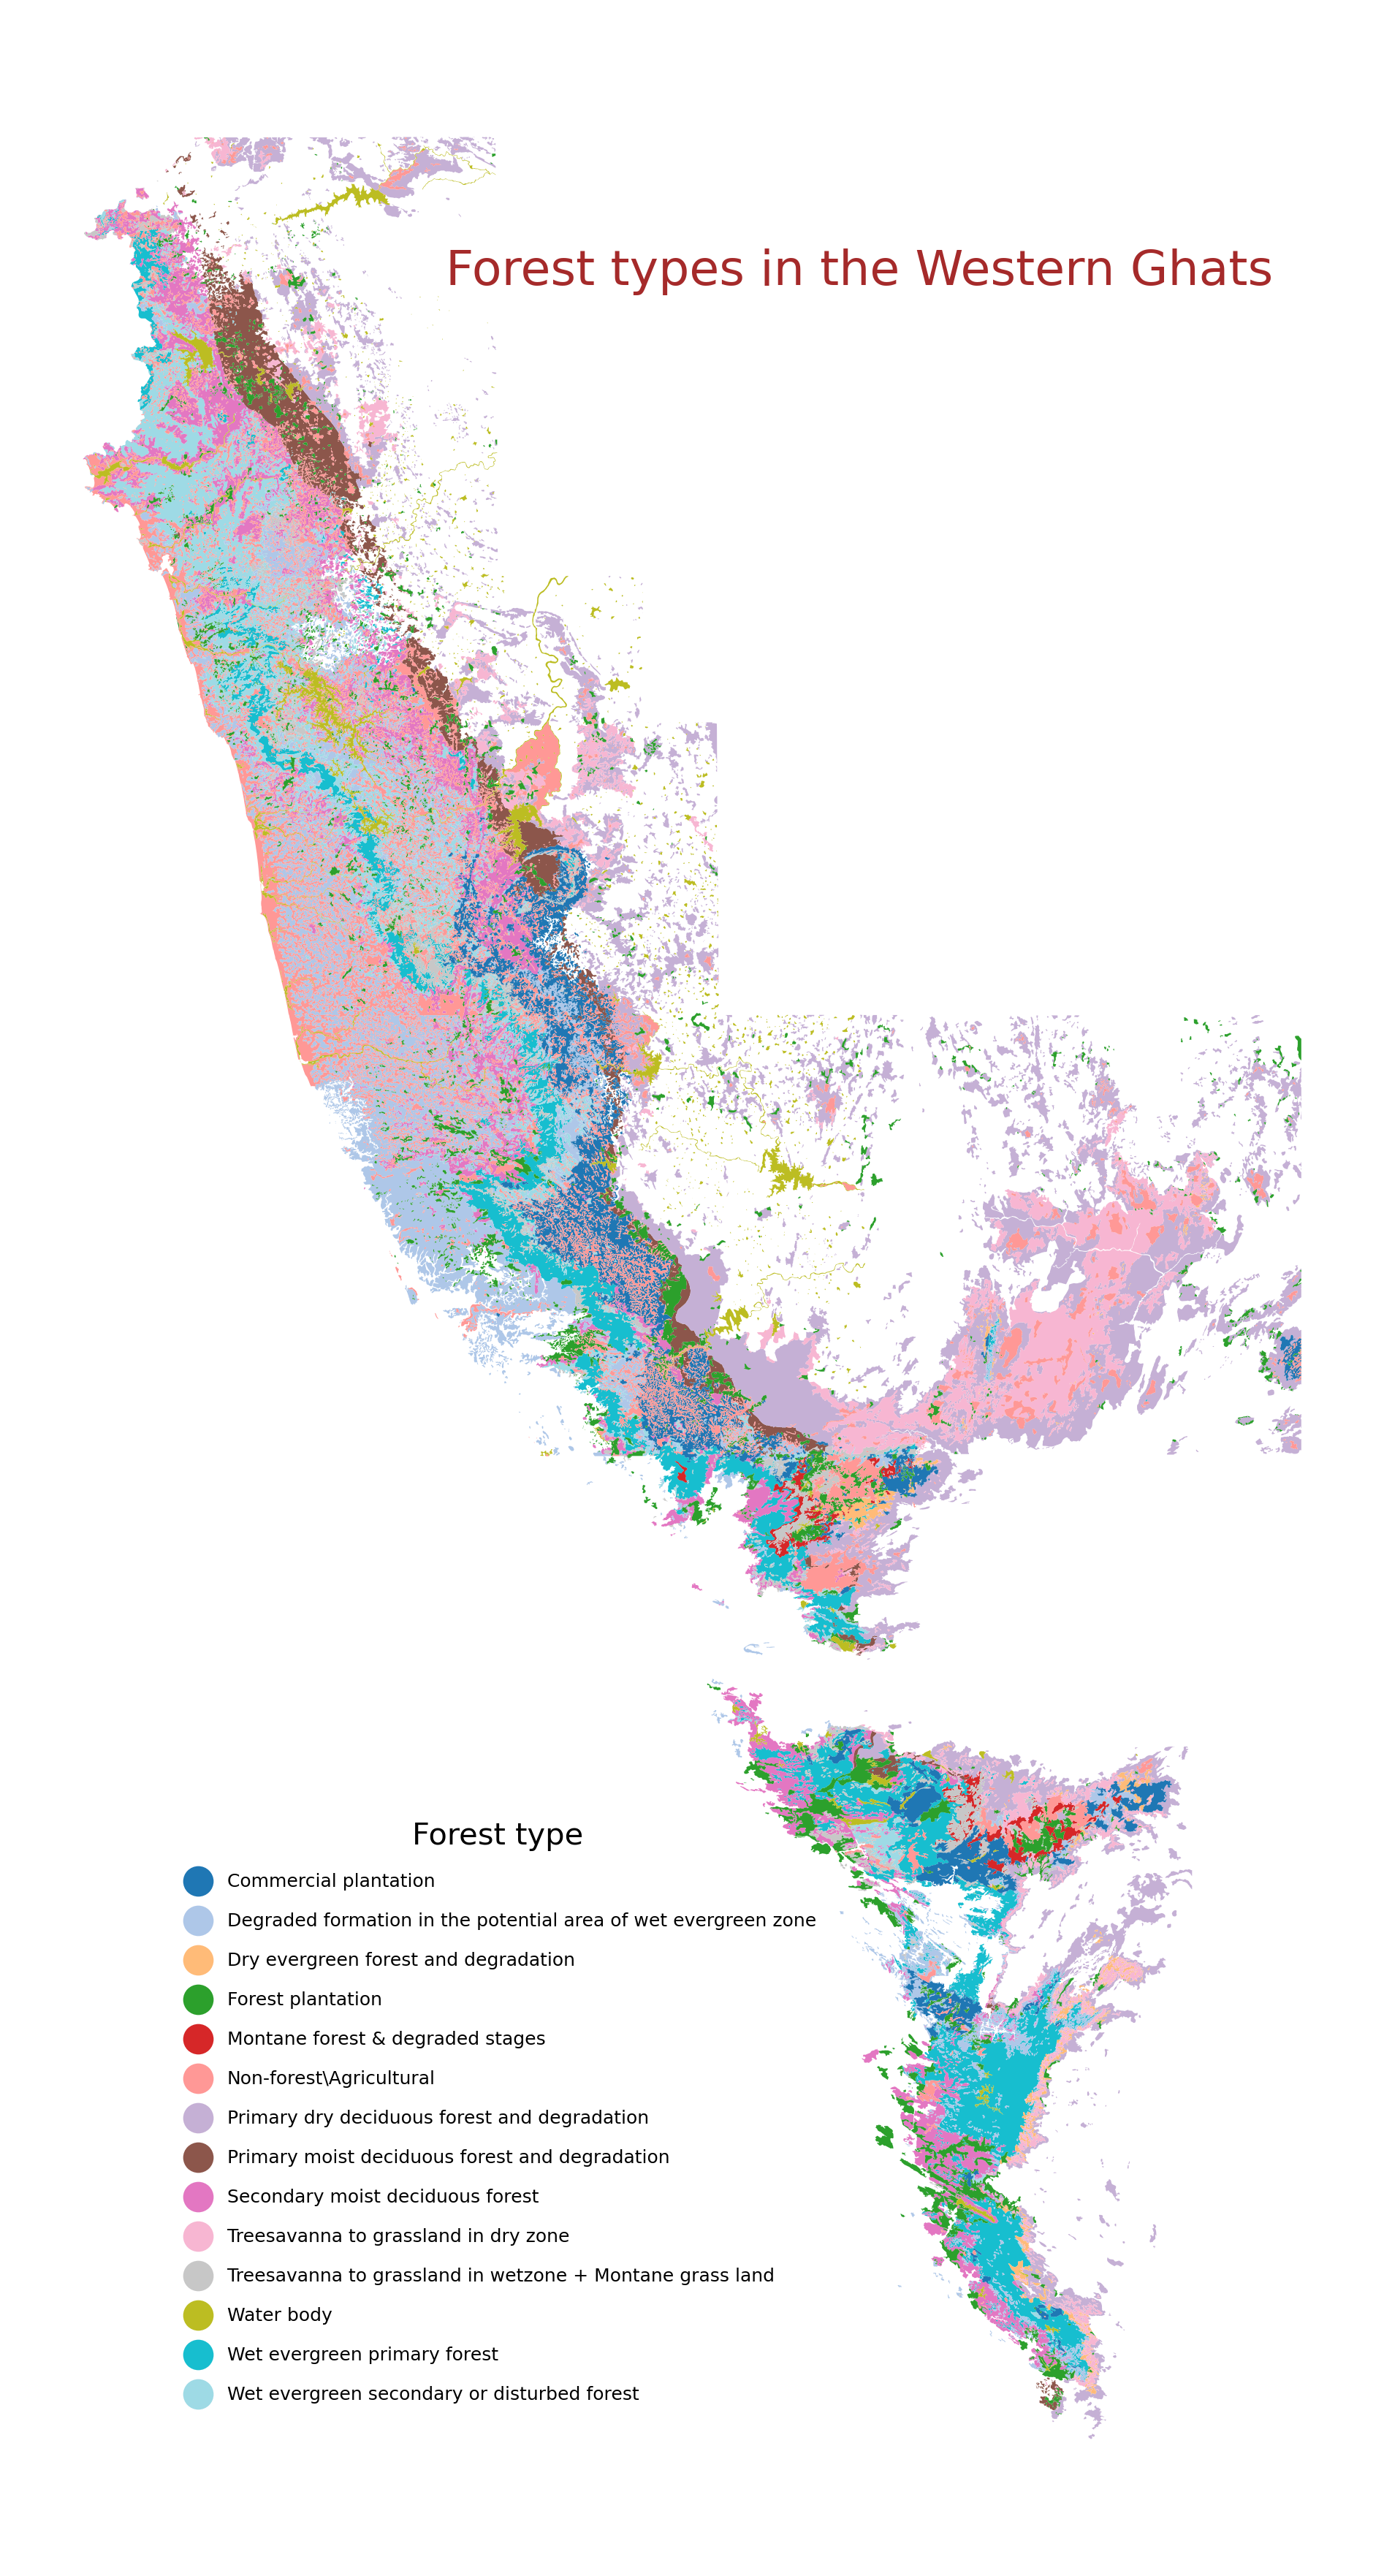

In [13]:
cmap = plt.colormaps.get_cmap("tab20")

legend_kwds= {
  'loc': 'lower left',
  'bbox_to_anchor': (0.1, 0.05),
  'frameon': False,
  'fontsize': 6,
  'title': 'Forest type',
  'labelspacing': 1.2,        # increases vertical spacing
   'handletextpad': 0.6,       # space between marker and text
   'borderpad': 0.8,           # internal padding of legend box
}
fig, ax = plt.subplots(figsize=(10, 15), dpi=300)
gdf_single.plot(ax=ax, 
         categorical = True,
         cmap = cmap,
         column = 'forest_typ',
         legend = True,
         legend_kwds = legend_kwds)

fig.text(x=0.40, 
         y=0.80, 
         s="Forest types in the Western Ghats", 
         size=16,
         color='brown')   

ax.set_axis_off()

plt.show()

In [135]:
# Suppose your GeoDataFrame is called gdf
gdf_single.to_file("wg_14_classes.shp")


C:\Users\ellen\AppData\Local\Temp\ipykernel_12076\194289471.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_single.to_file("wg_14_classes.shp")


We can also check on validity before upload:

In [14]:
valid_geometry =gdf_single.geometry.is_valid

In [15]:
valid_geometry.unique()

array([ True, False])

In [16]:
valid_geometry.value_counts()

True     27433
False      116
Name: count, dtype: int64

In [17]:
# Which geometries are invalid and why
# Extracts the polygons which are not valid
invalid = gdf_single[~gdf_single.geometry.is_valid]
invalid.head()


__mlocate_  __mlocate0  __mlocate1  __mlocate2  __mlocate3  __mlocate4  \
72     261814.0       276.0           1         0.0         1.0  2011-10-04   
200    261814.0       276.0           1         0.0         1.0  2011-10-04   
294    261814.0       276.0           1         0.0         1.0  2011-10-04   
393    261814.0       276.0           1         0.0         1.0  2011-10-04   
409    261814.0       276.0           1         0.0         1.0  2011-10-04   

     __mlocate5  __mlocate6  __mlocate7  __mlocate8         area  \
72          1.0  2011-10-04         1.0  2011-10-04  7476.796605   
200         1.0  2011-10-04         1.0  2011-10-04  7476.796605   
294         1.0  2011-10-04         1.0  2011-10-04  7476.796605   
393         1.0  2011-10-04         1.0  2011-10-04  7476.796605   
409         1.0  2011-10-04         1.0  2011-10-04  7476.796605   

        perimeter  code                    forest_typ  \
72   16187.360328   1.0  Wet evergreen primary forest   
200  16187.360328   1.0  Wet evergreen primary forest   
294  16187.360328   1.0  Wet evergreen primary forest   
393  16187.360328   1.0  Wet evergreen primary forest   
409  16187.360328   1.0  Wet evergreen primary forest   

                                              geometry  
72   POLYGON ((77.38537 8.57824, 77.38461 8.57845, ...  
200  POLYGON ((77.40903 9.55667, 77.40913 9.55671, ...  
294  POLYGON ((77.06545 10.28765, 77.06494 10.28835...  
393  POLYGON ((76.41993 11.22249, 76.42093 11.22212...  
409  POLYGON ((76.30309 11.49641, 76.30374 11.49613...

In [18]:
invalid.shape

(116, 15)

In [19]:
from shapely.validation import explain_validity

# Extract the reason only
gdf_single["validity_reason"] = gdf_single.geometry.apply(
    lambda geom: explain_validity(geom).split("[")[0].strip()
)

# Check the summary
gdf_single["validity_reason"].value_counts()


validity_reason
Valid Geometry            27433
Ring Self-intersection      116
Name: count, dtype: int64

In [21]:
gdf_single.head()

__mlocate_  __mlocate0  __mlocate1  __mlocate2  __mlocate3  __mlocate4  \
0    261814.0       276.0           1         0.0         1.0  2011-10-04   
1    261814.0       276.0           1         0.0         1.0  2011-10-04   
2    261814.0       276.0           1         0.0         1.0  2011-10-04   
3    261814.0       276.0           1         0.0         1.0  2011-10-04   
4    261814.0       276.0           1         0.0         1.0  2011-10-04   

   __mlocate5  __mlocate6  __mlocate7  __mlocate8         area     perimeter  \
0         1.0  2011-10-04         1.0  2011-10-04  7476.796605  16187.360328   
1         1.0  2011-10-04         1.0  2011-10-04  7476.796605  16187.360328   
2         1.0  2011-10-04         1.0  2011-10-04  7476.796605  16187.360328   
3         1.0  2011-10-04         1.0  2011-10-04  7476.796605  16187.360328   
4         1.0  2011-10-04         1.0  2011-10-04  7476.796605  16187.360328   

   code                    forest_typ  \
0   1.0  Wet evergreen primary forest   
1   1.0  Wet evergreen primary forest   
2   1.0  Wet evergreen primary forest   
3   1.0  Wet evergreen primary forest   
4   1.0  Wet evergreen primary forest   

                                            geometry validity_reason  
0  POLYGON ((77.50733 8.34598, 77.50746 8.34559, ...  Valid Geometry  
1  POLYGON ((77.48588 8.34754, 77.48559 8.34735, ...  Valid Geometry  
2  POLYGON ((77.47933 8.35384, 77.47863 8.35311, ...  Valid Geometry  
3  POLYGON ((77.49392 8.37097, 77.49303 8.37096, ...  Valid Geometry  
4  POLYGON ((77.48305 8.37366, 77.48321 8.37359, ...  Valid Geometry

In [22]:
# Create a geopandas dataframe only having the non-valid geometries
invalid = gdf_single[~gdf_single.geometry.is_valid].copy()
invalid.head()

__mlocate_  __mlocate0  __mlocate1  __mlocate2  __mlocate3  __mlocate4  \
72     261814.0       276.0           1         0.0         1.0  2011-10-04   
200    261814.0       276.0           1         0.0         1.0  2011-10-04   
294    261814.0       276.0           1         0.0         1.0  2011-10-04   
393    261814.0       276.0           1         0.0         1.0  2011-10-04   
409    261814.0       276.0           1         0.0         1.0  2011-10-04   

     __mlocate5  __mlocate6  __mlocate7  __mlocate8         area  \
72          1.0  2011-10-04         1.0  2011-10-04  7476.796605   
200         1.0  2011-10-04         1.0  2011-10-04  7476.796605   
294         1.0  2011-10-04         1.0  2011-10-04  7476.796605   
393         1.0  2011-10-04         1.0  2011-10-04  7476.796605   
409         1.0  2011-10-04         1.0  2011-10-04  7476.796605   

        perimeter  code                    forest_typ  \
72   16187.360328   1.0  Wet evergreen primary forest   
200  16187.360328   1.0  Wet evergreen primary forest   
294  16187.360328   1.0  Wet evergreen primary forest   
393  16187.360328   1.0  Wet evergreen primary forest   
409  16187.360328   1.0  Wet evergreen primary forest   

                                              geometry         validity_reason  
72   POLYGON ((77.38537 8.57824, 77.38461 8.57845, ...  Ring Self-intersection  
200  POLYGON ((77.40903 9.55667, 77.40913 9.55671, ...  Ring Self-intersection  
294  POLYGON ((77.06545 10.28765, 77.06494 10.28835...  Ring Self-intersection  
393  POLYGON ((76.41993 11.22249, 76.42093 11.22212...  Ring Self-intersection  
409  POLYGON ((76.30309 11.49641, 76.30374 11.49613...  Ring Self-intersection

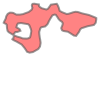

In [130]:
invalid.geometry.iloc[80]

We will see as of now if the shape file will upload in GEE. Seeing at the plot, we sometimes see shape files in other ones but this is potentially possible for forests where "rings" around a certain landscape exist.

In [23]:
# Suppose your GeoDataFrame is called gdf
gdf_single.to_file("wg_14_classes.shp")

C:\Users\ellen\AppData\Local\Temp\ipykernel_12972\694087503.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_single.to_file("wg_14_classes.shp")
